In [3]:
import pandas as pd
import numpy as np

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.hi.300.vec.gz
!gunzip cc.hi.300.vec.gz

In [4]:
df_l1= pd.read_csv('/kaggle/input/uli-dataset-label1/train_hi_l1.csv', engine = 'python')
df_l1

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_1,NaN,NaN,NaN,0.0,NaN
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_1,NaN,0.0,NaN,NaN,NaN
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_1,NaN,NaN,NaN,NaN,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_1,NaN,NaN,NaN,0.0,NaN
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_1,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_1,NaN,NaN,NaN,0.0,NaN
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_1,NaN,0.0,NaN,NaN,NaN
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_1,NaN,NaN,NaN,0.0,NaN
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_1,NaN,NaN,NaN,NaN,0.0


In [5]:
annotation_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            # Try converting to float
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            # Ignore non-numeric or missing values
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  # Favors 1 in a tie

In [7]:
# Apply to DataFrame
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label,axis=1)
df_l1

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5,label_1
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,question_1,NaN,0.0,NaN,NaN,NaN,0.0
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,question_1,NaN,NaN,NaN,NaN,0.0,0.0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",question_1,NaN,1.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6192,"😎 काम वाली बाई का फोन आया, पत्नि को। कामवाली ...",question_1,NaN,NaN,NaN,0.0,NaN,0.0
6193,😎😎ग्रुप में चर्चा चल रही थी कि 21 दिन के लॉक ड...,question_1,NaN,0.0,NaN,NaN,NaN,0.0
6194,🚩 🔱▁▂▄▅▆▇█🦁█▇▆▅▄▂▁🔱 🔱⚜️👉 School में हमें स...,question_1,NaN,NaN,NaN,0.0,NaN,0.0
6195,"🚩 #लंका का जिहादी डॉक्टर,हजारों हिंदू महिलाओं ...",question_1,NaN,NaN,NaN,NaN,0.0,0.0


In [8]:
# Combine directly assuming same text order
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],

})

# Convert to int
df = df.dropna(subset=['label_1'])
df['label_1'] = df['label_1'].astype(int)


# Preview
print(df.head())
print(df.shape)

                                                text  label_1
0    भारत में तीन किसान कानून बिल वापस लेने पर भक...        0
1    राजस्थान  अजीबोगरीब: गांव की खुशहाली के लिए ...        0
2    सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...        0
3  !!हर शब्द अमॄतम!!  पुरानी एक कहावत है... टूटी ...        0
4  "PM मोदी जी " की माँ के लिए अपशब्द कहने वाला द...        1
(6196, 2)


In [ ]:
df

In [9]:
import nltk
import string
import re

## Function to normalize text for pre-processing ##
def normalize_text(text):
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F700-\U0001F77F"  # alchemical symbols
                              u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                              u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                              u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                              u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                              u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                              u"\U00002702-\U000027B0"  # Dingbats
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
  text = text.lower()
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub('<handle replaced>', '', text)
  text = emoji_pattern.sub(r'', text)
  return text

In [10]:
df['text'] = df['text'].apply(lambda x: normalize_text(x))
df

,text,label_1
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,0
1,राजस्थान अजीबोगरीब गांव की खुशहाली के लिए ...,0
2,सलमान ने की राखी के विरोधी की वकालत तो आइटम...,0
3,हर शब्द अमॄतम पुरानी एक कहावत है टूटी ...,0
4,pm मोदी जी की माँ के लिए अपशब्द कहने वाला द...,1
...,...,...
6192,काम वाली बाई का फोन आया पत्नि को। कामवाली ...,0
6193,ग्रुप में चर्चा चल रही थी कि दिन के लॉक डाउन...,0
6194,school में हमें सती प्रथा घूंघट प्रथा ...,0
6195,लंका का जिहादी डॉक्टर हजारों हिंदू महिलाओं क...,0


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import matplotlib.pyplot as plt

# Load data
X_texts = list(df['text'])
y = df['label_1'].values
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-04-15 10:00:10.324399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744711210.525194      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744711210.584550      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:

max_features = 10000
max_len = 100
embed_size = 300

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_texts)
X_sequences = tokenizer.texts_to_sequences(X_texts)
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')
X_padded = np.array(X_padded)

# One-hot encode the labels
y_cat = np.eye(2)[y]
y_cat
X_padded

array([[  63,    5,  896, ...,    0,    0,    0],
       [ 629, 8331, 1047, ...,    0,    0,    0],
       [1783,   21,    3, ...,    0,    0,    0],
       ...,
       [   5,  357, 4739, ...,    0,    0,    0],
       [7806,    6,  201, ...,    0,    0,    0],
       [ 205,  205, 8227, ...,    0,    0,    0]], dtype=int32)

In [16]:
# Load HurtLex Hindi
hurtlex_df = pd.read_csv('/kaggle/input/hurtlex-hin/hurtlex_HI.tsv', sep='\t', engine='python', on_bad_lines='skip')


# Build category dictionary
hurtlex_dict = {}
for _, row in hurtlex_df.iterrows():
    word = str(row['lemma']).strip()
    category = str(row['category']).strip()
    if word not in hurtlex_dict:
        hurtlex_dict[word] = set()
    hurtlex_dict[word].add(category)

# Create category index
all_categories = sorted({cat for cats in hurtlex_dict.values() for cat in cats})
cat2idx = {cat: idx for idx, cat in enumerate(all_categories)}
num_cats = len(all_categories)

# Convert each text to HurtLex category vector
def get_hurtlex_vector(text):
    vec = np.zeros(num_cats)
    for token in text.split():
        if token in hurtlex_dict:
            for cat in hurtlex_dict[token]:
                vec[cat2idx[cat]] = 1
    return vec

hurtlex_features = np.array([get_hurtlex_vector(text) for text in df['text']])


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip -d glove
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")



Fold 1
Epoch 1 - Train Acc: 0.7101, Val Acc: 0.7189
Epoch 2 - Train Acc: 0.7121, Val Acc: 0.7040
Epoch 3 - Train Acc: 0.7260, Val Acc: 0.7334
Epoch 4 - Train Acc: 0.7305, Val Acc: 0.7356
Epoch 5 - Train Acc: 0.7447, Val Acc: 0.7369
Epoch 6 - Train Acc: 0.7453, Val Acc: 0.7353
Epoch 7 - Train Acc: 0.7502, Val Acc: 0.7424
Epoch 8 - Train Acc: 0.7547, Val Acc: 0.7353
Epoch 9 - Train Acc: 0.7547, Val Acc: 0.7440
Epoch 10 - Train Acc: 0.7505, Val Acc: 0.7331
Epoch 11 - Train Acc: 0.7589, Val Acc: 0.7437
Epoch 12 - Train Acc: 0.7608, Val Acc: 0.7395
Epoch 13 - Train Acc: 0.7615, Val Acc: 0.7431
Epoch 14 - Train Acc: 0.7637, Val Acc: 0.7389
Epoch 15 - Train Acc: 0.7718, Val Acc: 0.7414
Fold 1 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.77      0.92      0.84      2227
    Not Hate       0.58      0.29      0.39       871

    accuracy                           0.74      3098
   macro avg       0.67      0.60      0.61      3098
weighte

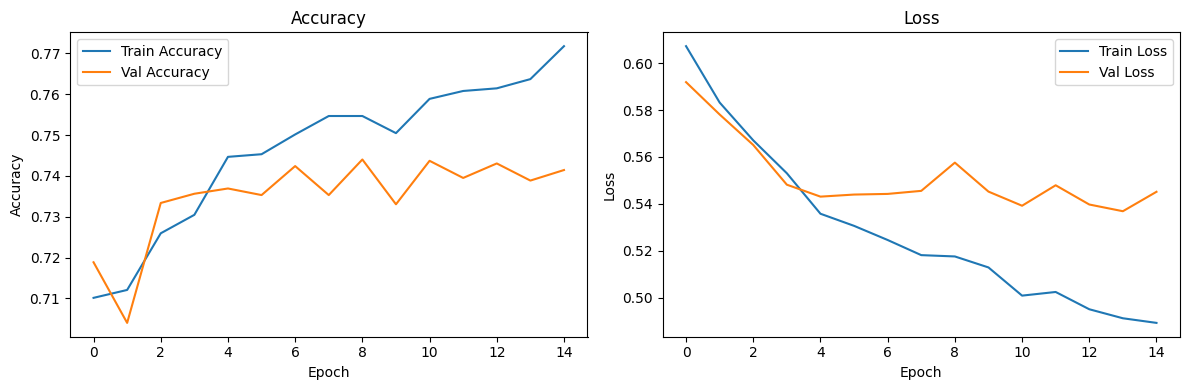


Fold 2
Epoch 1 - Train Acc: 0.7189, Val Acc: 0.7101
Epoch 2 - Train Acc: 0.7189, Val Acc: 0.7105
Epoch 3 - Train Acc: 0.7185, Val Acc: 0.7046
Epoch 4 - Train Acc: 0.7260, Val Acc: 0.7230
Epoch 5 - Train Acc: 0.7324, Val Acc: 0.7260
Epoch 6 - Train Acc: 0.7398, Val Acc: 0.7008
Epoch 7 - Train Acc: 0.7211, Val Acc: 0.7318
Epoch 8 - Train Acc: 0.7466, Val Acc: 0.7363
Epoch 9 - Train Acc: 0.7492, Val Acc: 0.7208
Epoch 10 - Train Acc: 0.7553, Val Acc: 0.7408
Epoch 11 - Train Acc: 0.7553, Val Acc: 0.7363
Epoch 12 - Train Acc: 0.7540, Val Acc: 0.7389
Epoch 13 - Train Acc: 0.7498, Val Acc: 0.7360
Epoch 14 - Train Acc: 0.7489, Val Acc: 0.7421
Epoch 15 - Train Acc: 0.7515, Val Acc: 0.7389
Fold 2 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.76      0.92      0.83      2200
    Not Hate       0.60      0.30      0.40       898

    accuracy                           0.74      3098
   macro avg       0.68      0.61      0.62      3098
weighte

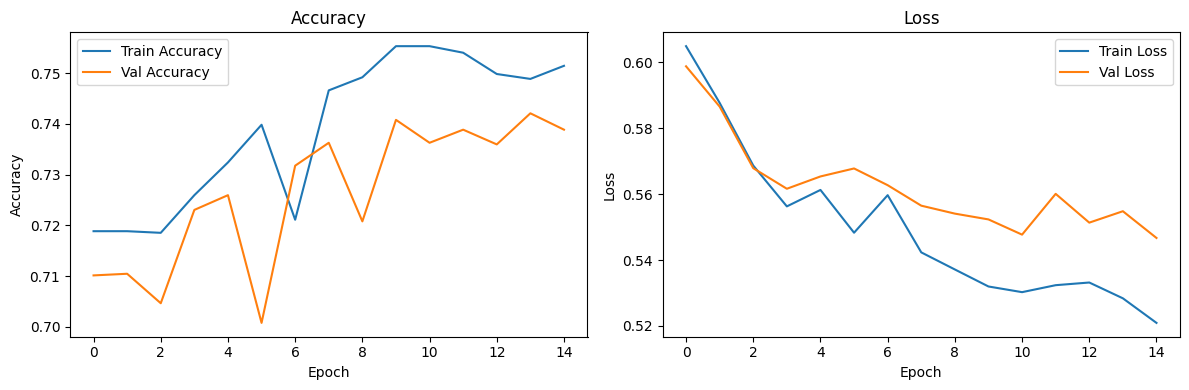


Average Results Across 2 Folds:
Precision: 0.72
Recall: 0.74
F1 Score: 0.71


In [17]:

# Load GloVe
embeddings_index = {}
with open('/kaggle/input/hindi-fasttext/cc.hi.300.vec', encoding="utf8") as f:    
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs



vocab_size = len(tokenizer.word_index) + 1  ## total distinct words is the Vocabulary ##
word_index = tokenizer.word_index
num_words = min(max_features,len(word_index)+1)


# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embed_size))
for word, i in tokenizer.word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


# Dataset
# class TextDataset(Dataset):
#     def __init__(self, X, y):
#         self.X = torch.LongTensor(X)
#         self.y = torch.FloatTensor(y)

#     def __len__(self):
#         return len(self.X)

#     def __getitem__(self, idx):
#         return self.X[idx], self.y[idx]


class DualInputDataset(Dataset):
    def __init__(self, X_seq, hurtlex_feats, y):
        self.X_seq = torch.LongTensor(X_seq)
        self.hurtlex_feats = torch.FloatTensor(hurtlex_feats)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X_seq)

    def __getitem__(self, idx):
        return self.X_seq[idx], self.hurtlex_feats[idx], self.y[idx]


# Model
# class LSTMClassifier(nn.Module):
#     def __init__(self, embedding_matrix):
#         super(LSTMClassifier, self).__init__()
#         vocab_size, embed_size = embedding_matrix.shape
#         self.embedding = nn.Embedding(vocab_size, embed_size)
#         self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
#         self.embedding.weight.requires_grad = False
#         self.dropout1 = nn.Dropout(0.2)
#         self.conv1 = nn.Conv1d(embed_size, 64, kernel_size=2)
#         self.lstm = nn.LSTM(64, 128, batch_first=True, bidirectional=True)
#         self.avgpool = nn.AdaptiveAvgPool1d(1)
#         self.fc = nn.Linear(256, 128)
#         self.dropout2 = nn.Dropout(0.2)
#         self.out = nn.Linear(128, 2)

#     def forward(self, x):
#         x = self.embedding(x)
#         x = self.dropout1(x)
#         x = x.permute(0, 2, 1)
#         x = self.conv1(x)
#         x = x.permute(0, 2, 1)
#         x, _ = self.lstm(x)
#         x = x.permute(0, 2, 1)
#         x = self.avgpool(x).squeeze(2)
#         x = torch.relu(self.fc(x))
#         x = self.dropout2(x)
#         return self.out(x)

class DualBranchClassifier(nn.Module):
    def __init__(self, embedding_matrix, hurtlex_input_dim):
        super(DualBranchClassifier, self).__init__()
        vocab_size, embed_size = embedding_matrix.shape
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False

        self.dropout1 = nn.Dropout(0.2)
        self.conv1 = nn.Conv1d(embed_size, 64, kernel_size=2)
        self.lstm = nn.LSTM(64, 128, batch_first=True, bidirectional=True)
        self.avgpool = nn.AdaptiveAvgPool1d(1)

        self.hurtlex_fc = nn.Sequential(
            nn.Linear(hurtlex_input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        self.fusion = nn.Sequential(
            nn.Linear(256 + 64, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 2)
        )

    def forward(self, x_seq, x_hurtlex):
        x = self.embedding(x_seq)
        x = self.dropout1(x)
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = x.permute(0, 2, 1)
        x = self.avgpool(x).squeeze(2)

        hurtlex_feat = self.hurtlex_fc(x_hurtlex)
        combined = torch.cat((x, hurtlex_feat), dim=1)
        return self.fusion(combined)


# Training and Evaluation
kf = KFold(n_splits=2, shuffle=True, random_state=42)
precision_list, recall_list, f1_list = [], [], []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_padded)):
    print(f"\nFold {fold+1}")
    # train_dataset = TextDataset(X_padded[train_idx], y_cat[train_idx])
    # val_dataset = TextDataset(X_padded[val_idx], y_cat[val_idx])
    train_dataset = DualInputDataset(X_padded[train_idx], hurtlex_features[train_idx], y_cat[train_idx])
    val_dataset = DualInputDataset(X_padded[val_idx], hurtlex_features[val_idx], y_cat[val_idx])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)

    model = DualBranchClassifier(embedding_matrix, hurtlex_input_dim=num_cats).to(device)

    optimizer = optim.Adam(model.parameters(), lr=0.0005)
    criterion = nn.CrossEntropyLoss()

    train_acc_hist, val_acc_hist, train_loss_hist, val_loss_hist = [], [], [], []
    best_val_f1 = 0.0
    best_model_path = f"model{fold+1}.pt"

     
    for epoch in range(15):
        model.train()
        total_loss, correct = 0, 0
        for x_seq, x_hurtlex, labels in train_loader:
            x_seq, x_hurtlex, labels = x_seq.to(device), x_hurtlex.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(x_seq, x_hurtlex)
            loss = criterion(outputs, torch.argmax(labels, dim=1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            preds = torch.argmax(outputs, axis=1)
            correct += (preds == torch.argmax(labels, dim=1)).sum().item()

        train_acc = correct / len(train_loader.dataset)
        train_acc_hist.append(train_acc)
        train_loss_hist.append(total_loss / len(train_loader))

        model.eval()
        val_loss, correct = 0, 0
        y_preds, y_true = [], []
        with torch.no_grad():
            for x_seq, x_hurtlex, labels in val_loader:
                x_seq, x_hurtlex, labels = x_seq.to(device), x_hurtlex.to(device), labels.to(device)
                outputs = model(x_seq, x_hurtlex)
                loss = criterion(outputs, torch.argmax(labels, dim=1))
                val_loss += loss.item()
                preds = torch.argmax(outputs, axis=1)
                correct += (preds == torch.argmax(labels, dim=1)).sum().item()
                y_preds.extend(preds.cpu().numpy())
                y_true.extend(torch.argmax(labels, axis=1).cpu().numpy())

        val_acc = correct / len(val_loader.dataset)
        val_acc_hist.append(val_acc)
        val_loss_hist.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
        

    # Metrics
    report = classification_report(y_true, y_preds, target_names=['Hate', 'Not Hate'], output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    val_f1 = report['weighted avg']['f1-score']

    
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), best_model_path)
    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_true, y_preds, target_names=["Hate", "Not Hate"])}\n')

    # Plots
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc_hist, label="Train Accuracy")
    plt.plot(val_acc_hist, label="Val Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_loss_hist, label="Train Loss")
    plt.plot(val_loss_hist, label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Final Results
print("\nAverage Results Across 2 Folds:")
print(f"Precision: {np.mean(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.2f}")


In [18]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Assuming you have `y_val_labels` and `y_pred_labels` as the true and predicted labels

# Compute F1 score, precision, and recall
f1 = f1_score(y_true, y_preds, average='weighted')
precision = precision_score(y_true, y_preds, average='weighted')
recall = recall_score(y_true, y_preds, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)


F1 Score: 0.7080564573836885
Precision: 0.7152200894495911
Recall: 0.7388637830858619
{'Hate': {'precision': 0.7631479379493, 'recall': 0.9168181818181819, 'f1-score': 0.8329547800949824, 'support': 2200}, 'Not Hate': {'precision': 0.5978021978021978, 'recall': 0.3028953229398664, 'f1-score': 0.4020694752402069, 'support': 898}, 'accuracy': 0.7388637830858619, 'macro avg': {'precision': 0.680475067875749, 'recall': 0.6098567523790241, 'f1-score': 0.6175121276675947, 'support': 3098}, 'weighted avg': {'precision': 0.7152200894495911, 'recall': 0.7388637830858619, 'f1-score': 0.7080564573836885, 'support': 3098}}


In [19]:
vv = pd.read_csv('/kaggle/input/uli-dataset-label1/test_hi_l1.csv', on_bad_lines='skip', engine='python')


In [20]:
import string
def normalize_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text
## Apply the written function ##
vv['text'] = vv['text'].apply(lambda x: normalize_text(x))
processed_list = []
for j in vv['text']:
    process = j.replace('...','')
    processed_list.append(process)

vv = pd.DataFrame(processed_list)
vv.columns = ['text']
vv.head(n=5)


,text
0,bandrastation sharadpawar muradabad अगर अभ...
1,conspiracyagainstindia सुन लो रे देश के गद्द...
2,marathareservation महाराष्ट्र में जश्न का म...
3,rheachakraborty aap mahesh bhatt se madad kiy...
4,secularmaskofd हमे पता नहि क्या कहते है इतना...


In [27]:
# model = DualBranchClassifier(embedding_matrix, hurtlex_input_dim=num_cats).to(device)

# model.load_state_dict(torch.load('/kaggle/working/model2.pt', map_location=device))
# model.eval()

# # 5. Preprocess input text
# sequence = tokenizer.texts_to_sequences(vv['text'])  # same tokenizer used in training
# sequence = pad_sequences(sequence, padding='post', maxlen=max_len)
# input_tensor = torch.tensor(sequence).long().to(device)

# # 6. Make predictions
# with torch.no_grad():
#     outputs = model(input_tensor)
#     predictions = torch.argmax(outputs, dim=1).cpu().numpy()

# # 7. Save predictions to CSV
# ids = np.arange(1, len(predictions) + 1)
# result_df = pd.DataFrame({'id': ids, 'value': predictions})
# result_df.to_csv('/kaggle/working/Task1_output_hindi.csv', index=False)

# print(result_df.head())

# 1. Load the dual-branch model (text + HurtLex)
model = DualBranchClassifier(embedding_matrix, hurtlex_input_dim=num_cats).to(device)
model.load_state_dict(torch.load('/kaggle/working/model1.pt', map_location=device))
model.eval()

# 2. Preprocess input text
sequence = tokenizer.texts_to_sequences(vv['text'])  # same tokenizer used in training
sequence = pad_sequences(sequence, padding='post', maxlen=max_len)
input_tensor = torch.tensor(sequence).long().to(device)

# 3. Generate HurtLex feature vectors for test samples
test_hurtlex_feats = np.array([get_hurtlex_vector(text) for text in vv['text']])
hurtlex_tensor = torch.tensor(test_hurtlex_feats).float().to(device)

# 4. Make predictions
with torch.no_grad():
    outputs = model(input_tensor, hurtlex_tensor)
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()

# 5. Save predictions to CSV
ids = np.arange(1, len(predictions) + 1)
result_df = pd.DataFrame({'id': ids, 'value': predictions})
result_df.to_csv('/kaggle/working/Task1_output_hindi.csv', index=False)

# 6. Preview output
print(result_df.head())


   id  value
0   1      0
1   2      1
2   3      0
3   4      0
4   5      0


/tmp/ipykernel_31/3335775979.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/working/model1.pt', map_location=device))


In [ ]:
result_df

In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

# Load and compute label_1
true_df = pd.read_csv('/kaggle/input/uli-dataset-label1/test_hi_l1.csv', on_bad_lines='skip', engine='python')

annotation_cols = ['hi_a1', 'hi_a2', 'hi_a3', 'hi_a4', 'hi_a5']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            continue
    if not valid_votes:
        return None
    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)
    return 1 if ones >= zeros else 0

# Apply majority vote
true_df['label_1'] = true_df[annotation_cols].apply(get_majority_label, axis=1)

# Drop rows with NaN labels and reset index
true_df = true_df.dropna(subset=['label_1']).reset_index(drop=True)
true_labels = true_df['label_1'].astype(int).values

# Truncate predictions to match (in case there's 1 extra)
predictions = predictions[:len(true_labels)]

# Metrics
f1 = f1_score(true_labels, predictions, average='weighted')
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
accuracy = accuracy_score(true_labels, predictions)

print("\nEvaluation on Test Set:")
print(f"F1 Score:      {f1:.4f}")
print(f"Precision:     {precision:.4f}")
print(f"Recall:        {recall:.4f}")
print(f"Accuracy:      {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=["Hate", "Not Hate"]))



Evaluation on Test Set:
F1 Score:      0.7608
Precision:     0.7576
Recall:        0.7817
Accuracy:      0.7817

Classification Report:
              precision    recall  f1-score   support

        Hate       0.82      0.92      0.87      1158
    Not Hate       0.56      0.34      0.42       358

    accuracy                           0.78      1516
   macro avg       0.69      0.63      0.64      1516
weighted avg       0.76      0.78      0.76      1516

